In [1]:
import numpy as np # linear algebra - is for nerds.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from bokeh.plotting import figure, show
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#read in master dataset
df = pd.read_csv('C:/Users/jgles/dawg/Analysis/CFB_Dataset_PROD.csv')
#df

## Avg Rank and Yard Diff Per Play

There are two statistics that we want to derive and track throughout time.

Through the original analysis, the <Average Rank> and **Net Yards Per Play** appeared to be powerful predictive metrics.  We will investigate here whether or not they hold predictive power throughout time.
    
We calculate those stats here.

In [3]:
#Here we can change which year we are looking at.

#df = df20
df['Avg Rank']=(df['Off.Rank']+df['Def.Rank'])/2
df['Net Yards Per Play']=df['Off.Yards.Play'] - df['Yards.Play.Allowed']
df['winpct']=df['Win'] / df['Games']
#df.head()

In [4]:
# If there are some extra columns, we drop them here that we drop here.

#df = df.drop(['Unnamed: 147',
# 'Unnamed: 148',
# 'Unnamed: 149',
# 'Unnamed: 150',
# 'Unnamed: 151',
# 'Unnamed: 152'],
#       axis = 1)

# Since we are exploring tracking certain statistics through time, we will create dataframes for each season within the dataset.

is_2013 = df['Season'] == 2013
df13 = df[is_2013]

is_2014 = df['Season'] == 2014
df14 = df[is_2014]

is_2015 = df['Season'] == 2015
df15 = df[is_2015]

is_2016 = df['Season'] == 2016
df16 = df[is_2016]

is_2017 = df['Season'] == 2017
df17 = df[is_2017]

is_2018 = df['Season'] == 2018
df18 = df[is_2018]

is_2019 = df['Season'] == 2019
df19 = df[is_2019]

is_2020 = df['Season'] == 2020
df20 = df[is_2020]




In [5]:
#list(df)

In [6]:
data = df[['TS_ID',
 'Team',
 'Season',
 'Conference',
 'NatChamp',
 'Playoff',
 'ConfChamp',
 'Heisman',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pass.Yards.Per.Game',
 'Pass.Def.Rank',
 'Opp.Completions.Allowed',
 'Opp.Pass.Attempts',
 'Opp.Pass.Yds.Allowed',
 'Opp.Pass.TDs.Allowed',
 'Yards.Attempt.Allowed',
 'Yards.Completion.Allowed',
 'Pass.Yards.Per.Game.Allowed',
 'Penalty.Rank',
 'Penalties',
 'Penalty.Yards',
 'Penalty.Yards.Per.Game',
 'Punt.Return.Rank',
 'Punt.Returns',
 'Net.Punt.Return.Yards',
 'Punt.Return.Touchdowns',
 'Avg.Yards.Per.Punt.Return',
 'Punt.Return.Def.Rank',
 'Opp.Punt.Returns',
 'Opp.Net.Punt.Return.Yards',
 'Opp.Punt.Return.Touchdowns.Allowed',
 'Avg.Yards.Allowed.per.Punt.Return',
 'Redzone.Off.Rank',
 'Redzone.Attempts',
 'Redzone.Rush.TD',
 'Redzone.Pass.TD',
 'Redzone.Field.Goals.Made',
 'Redzone.Scores',
 'Redzone.Points',
 'Redzone.Def.Rank',
 'Opp.Redzone.Attempts',
 'Opp.Redzone.Rush.TD.Allowed',
 'Opp.Redzone.Pass.Touchdowns.Allowed',
 'Opp.Redzone.Field.Goals.Made',
 'Opp.Redzone.Scores',
 'Redzone.Points.Allowed',
 'Rushing.Off.Rank',
 'Rush.Attempts',
 'Rush.Yds',
 'Yards.Rush',
 'Rushing.TD',
 'Rushing.Yards.per.Game',
 'Rushing.Def.Rank',
 'Opp.Rush.Attempts',
 'Opp.Rush.Yards.Alloweed',
 'Yds.Rush.Allowed',
 'Opp.Rush.Touchdowns.Allowed',
 'Rush.Yards.Per.Game.Allowed',
 'Sack.Rank',
 'Sacks',
 'Sack.Yards',
 'Average.Sacks.per.Game',
 'Scoring.Def.Rank',
 'Touchdowns.Allowed',
 'Opponent.Extra.Points',
 'X2.Point.Conversions.Allowed',
 'Opp.Deflected.Extra.Points',
 'Opp.Feild.Goals.Made',
 'Opp.Safety',
 'Points.Allowed',
 'Avg.Points.per.Game.Allowed',
 'Scoring.Off.Rank',
 'Touchdowns',
 'PAT',
 'X2.Point.Conversions',
 'Defensive.Points',
 'Feild.Goals',
 'Safety',
 'Total.Points',
 'Points.Per.Game',
 'Tackle.for.Loss.Rank',
 'Solo.Tackle.For.Loss',
 'Assist.Tackle.For.Loss',
 'Tackle.for.Loss.Yards',
 'Total.Tackle.For.Loss',
 'Tackle.For.Loss.Per.Game',
 'X3rd.Down.Rank',
 'X3rd.Attempts',
 'X3rd.Conversions',
 'X3rd.Percent',
 'X3rd.Down.Def.Rank',
 'Opp.3rd.Conversion',
 'Opp.3rd.Attempt',
 'Opponent.3rd.Percent',
 'Time.of.Possession.Rank',
 'Average.T.O.P',
 'Turnover.Rank',
 'Fumbles.Recovered',
 'Opponents.Intercepted',
 'Turnovers.Gain',
 'Fumbles.Lost',
 'Interceptions.Thrown.y',
 'Turnovers.Lost',
 'Turnover.Margin',
 'Avg.Turnover.Margin.per.Game',
 'Avg Rank',
 'Net Yards Per Play',
 'winpct']
]
correlation=data.corr(method='pearson')
#correlation

In [7]:
# Lets get a better view of the list
#pd.set_option('display.max_rows', 200)

In [8]:
#correlation.drop(correlation.columns.difference(['winpct']),1, inplace=True)
#correlation.sort_values(by=['winpct'], ascending=False)

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'DEF TEAM RANK vs WIN %')

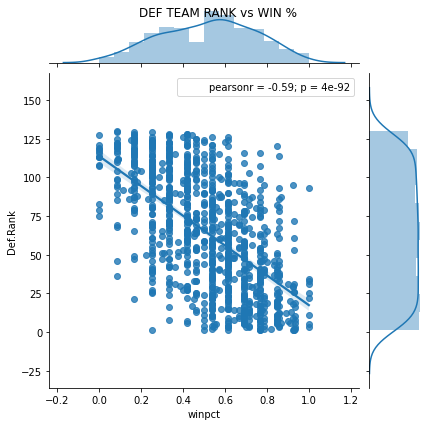

In [9]:
g=sns.jointplot('winpct','Def.Rank',df,kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('DEF TEAM RANK vs WIN %')
#plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'OFF TEAM RANK vs WIN %')

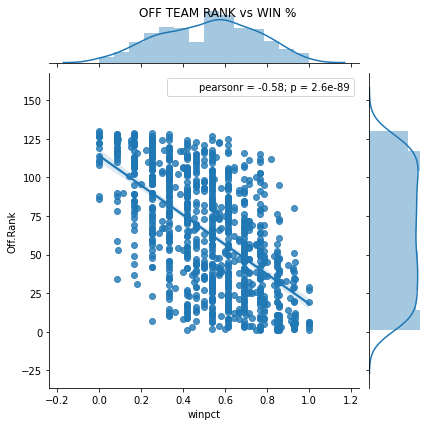

In [10]:
#Regression graph for Offensive Rank and Defensive Rank Vs Win Pct with correlation

#Results show a stronger correlation between Defensive Rank and Win Pct

g=sns.jointplot('winpct','Off.Rank',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('OFF TEAM RANK vs WIN %')
#plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'Net Yards Per Play vs WIN %')

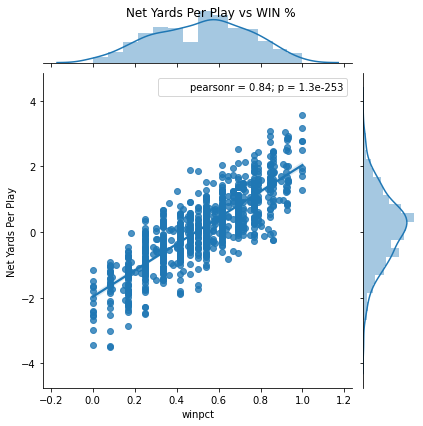

In [11]:
#Regression graph for NYPP Vs Win Pct with correlation

#Results show a stronger correlation between NYPP and Winpct

g=sns.jointplot('winpct','Net Yards Per Play',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('Net Yards Per Play vs WIN %')
#plt.show()

Text(0.5, 1.0, 'Net Yards Per Play(Off & Def) for Power 5 Conferences')

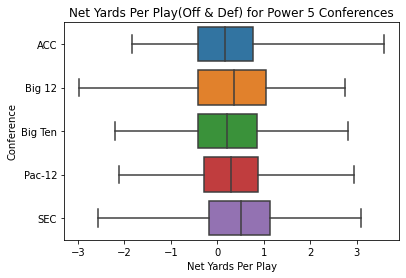

In [12]:
filter=df['Conference']== 'ACC'
filter2=df['Conference']== 'SEC'
filter3=df['Conference']== 'Big 12'
filter4=df['Conference']== 'Big Ten' 
filter5=df['Conference']== 'Pac-12'
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Net Yards Per Play'], dfn['Conference'], whis=np.inf)
plt.title('Net Yards Per Play(Off & Def) for Power 5 Conferences')
#plt.show()
#df[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play', 'NatChamp', 'Playoff', 'ConfChamp']].sort_values('Net Yards Per Play', ascending = False)[0:25]

Text(0.5, 1.0, 'Avg Rank(Off & Def) for Power 5 Conferences')

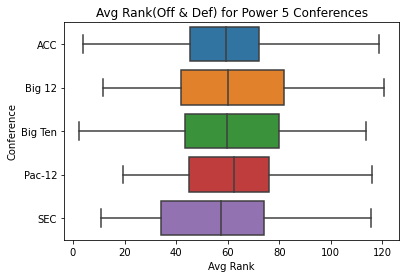

In [13]:
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Avg Rank'], dfn['Conference'], whis=np.inf)
plt.title('Avg Rank(Off & Def) for Power 5 Conferences')
#plt.show()
#df[['Team', 'Season', 'winpct', 'Off.Rank', 'Def.Rank','Avg Rank', 'NatChamp', 'Playoff', 'ConfChamp']].sort_values('Avg Rank', ascending = True)[0:25]

In [14]:
# Bottom 10 in Avg Rank
#df[['Team', 'Season','Off.Rank','Def.Rank','Avg Rank']].sort_values('Avg Rank')[-10:]

In [15]:
# Bottom 10 in NYPP. THEY STINK COACH!

# Bottom 10 in Avg Rank
#df[['Team', 'Season', 'Win', 'Loss','Net Yards Per Play']].sort_values('Net Yards Per Play', ascending=False)[-10:]

In [16]:
#df19[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play', 'NatChamp', 'Playoff', 'ConfChamp']].sort_values('Net Yards Per Play', ascending = False)[0:25]
#df[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play', 'NatChamp', 'Playoff', 'ConfChamp', 'Heisman']].sort_values('Heisman', ascending = False)[0:25]

In [17]:
#Kick out the Df for visualization in Tableau
#df.to_csv("All_TimeTableauCFB.csv")

In [18]:
df_backup = df

In [23]:
#!pip install plotly 
import plotly.express as px

fig = px.scatter(df, x ="winpct", y = "Turnover.Margin", color = "Conference",   
                #category_orders={"AAC", "ACC", "Big 12", "Big Ten", "C-USA", "FBS Independent", "MAC", "Mountain West", "MWC", "Pac-12", "SEC", "Sun Belt"},  
                hover_data = {'Team':True,
                               'Season': True,
                               'winpct':False, #Removes WinPct from Tooltip
                               'Conference':False,
                               'Net Yards Per Play':':.1f'
                                
                              })
                 
#Vertical Line to show .500 Winning Percentage
fig.add_shape(type="line", x0=.5, y0=-4, x1=.5, y1=55,
    line=dict(color="black",width=2))
#Horizontal Line to Show +,- NYPP
fig.add_shape(type="line", x0=0, y0=0, x1=1, y1=0,
    line=dict(color="black",width=2))

#Formats the Tooltip
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

fig.show()

In [20]:
#!pip install plotly 
import plotly.express as px

fig = px.scatter(df19, x ="winpct", y = "Off", color = "Conference", 
                 hover_data = {'Team':True,
                               'Season': True,
                               'winpct':False, #Removes WinPct from Tooltip
                               'Conference':False,
                               'Net Yards Per Play':':.1f'
                                
                              })
#Vertical Line to show .500 Winning Percentage
fig.add_shape(type="line", x0=.5, y0=-4, x1=.5, y1=4,
    line=dict(color="black",width=2))
#Horizontal Line to Show +,- NYPP
fig.add_shape(type="line", x0=0, y0=0, x1=1, y1=0,
    line=dict(color="black",width=2))

#Formats the Tooltip
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['TS_ID', 'Team', 'Season', 'Conference', 'NatChamp', 'Playoff', 'ConfChamp', 'Heisman', 'Games', 'Win', 'Loss', 'Off.Rank', 'Off.Plays', 'Off.Yards', 'Off.Yards.Play', 'Off.TDs', 'Off.Yards.per.Game', 'Def.Rank', 'Def.Plays', 'Yards.Allowed', 'Yards.Play.Allowed', 'Off.TDs.Allowed', 'Total.TDs.Allowed', 'Yards.Per.Game.Allowed', 'First.Down.Rank', 'First.Down.Runs', 'First.Down.Passes', 'First.Down.Penalties', 'First.Downs', 'First.Down.Def.Rank', 'Opp.First.Down.Runs', 'Opp.First.Down.Passes', 'Opp.First.Down.Penalties', 'Opp.First.Downs', 'X4th.Down.Rank', 'X4th.Attempts', 'X4th.Conversions', 'X4th.Percent', 'X4rd.Down.Def.Rank', 'Opp.4th.Conversion', 'Opp.4th.Attempt', 'Opponent.4th.Percent', 'Kickoff.Return.Rank', 'Kickoffs.Returned', 'Kickoff.Return.Yards', 'Kickoff.Return.Touchdowns', 'Avg.Yard.per.Kickoff.Return', 'Passing.Off.Rank', 'Pass.Attempts', 'Pass.Completions', 'Interceptions.Thrown.x', 'Pass.Yards', 'Pass.Yards.Attempt', 'Yards.Completion', 'Pass.Touchdowns', 'Pass.Yards.Per.Game', 'Pass.Def.Rank', 'Opp.Completions.Allowed', 'Opp.Pass.Attempts', 'Opp.Pass.Yds.Allowed', 'Opp.Pass.TDs.Allowed', 'Yards.Attempt.Allowed', 'Yards.Completion.Allowed', 'Pass.Yards.Per.Game.Allowed', 'Penalty.Rank', 'Penalties', 'Penalty.Yards', 'Penalty.Yards.Per.Game', 'Punt.Return.Rank', 'Punt.Returns', 'Net.Punt.Return.Yards', 'Punt.Return.Touchdowns', 'Avg.Yards.Per.Punt.Return', 'Punt.Return.Def.Rank', 'Opp.Punt.Returns', 'Opp.Net.Punt.Return.Yards', 'Opp.Punt.Return.Touchdowns.Allowed', 'Avg.Yards.Allowed.per.Punt.Return', 'Redzone.Off.Rank', 'Redzone.Attempts', 'Redzone.Rush.TD', 'Redzone.Pass.TD', 'Redzone.Field.Goals.Made', 'Redzone.Scores', 'Redzone.Points', 'Redzone.Def.Rank', 'Opp.Redzone.Attempts', 'Opp.Redzone.Rush.TD.Allowed', 'Opp.Redzone.Pass.Touchdowns.Allowed', 'Opp.Redzone.Field.Goals.Made', 'Opp.Redzone.Scores', 'Redzone.Points.Allowed', 'Rushing.Off.Rank', 'Rush.Attempts', 'Rush.Yds', 'Yards.Rush', 'Rushing.TD', 'Rushing.Yards.per.Game', 'Rushing.Def.Rank', 'Opp.Rush.Attempts', 'Opp.Rush.Yards.Alloweed', 'Yds.Rush.Allowed', 'Opp.Rush.Touchdowns.Allowed', 'Rush.Yards.Per.Game.Allowed', 'Sack.Rank', 'Sacks', 'Sack.Yards', 'Average.Sacks.per.Game', 'Scoring.Def.Rank', 'Touchdowns.Allowed', 'Opponent.Extra.Points', 'X2.Point.Conversions.Allowed', 'Opp.Deflected.Extra.Points', 'Opp.Feild.Goals.Made', 'Opp.Safety', 'Points.Allowed', 'Avg.Points.per.Game.Allowed', 'Scoring.Off.Rank', 'Touchdowns', 'PAT', 'X2.Point.Conversions', 'Defensive.Points', 'Feild.Goals', 'Safety', 'Total.Points', 'Points.Per.Game', 'Tackle.for.Loss.Rank', 'Solo.Tackle.For.Loss', 'Assist.Tackle.For.Loss', 'Tackle.for.Loss.Yards', 'Total.Tackle.For.Loss', 'Tackle.For.Loss.Per.Game', 'X3rd.Down.Rank', 'X3rd.Attempts', 'X3rd.Conversions', 'X3rd.Percent', 'X3rd.Down.Def.Rank', 'Opp.3rd.Conversion', 'Opp.3rd.Attempt', 'Opponent.3rd.Percent', 'Time.of.Possession.Rank', 'Average.T.O.P', 'Turnover.Rank', 'Fumbles.Recovered', 'Opponents.Intercepted', 'Turnovers.Gain', 'Fumbles.Lost', 'Interceptions.Thrown.y', 'Turnovers.Lost', 'Turnover.Margin', 'Avg.Turnover.Margin.per.Game', 'Avg Rank', 'Net Yards Per Play', 'winpct'] but received: Off